The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. We will set an arbitrary cutoff for our dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'
.We will use machine learning to determine which physiochemical properties make a wine good.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("wine_project.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape


(1599, 12)

We have 12 columns and 1599 rows in the dataset

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Above are the name of all the twelve columns

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values present

In [8]:
df['quality']=df['quality'].replace([1,2,3,4,5,6],0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


As instructed ,all the ranking from 1-6 from the "quality" column were replaced by 0(bad)from all the rows.

In [9]:
df['quality']=df['quality'].replace([7,8,9,10],1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
The values from 7-10 wewre replaced by 1 indicating good quality

In [114]:
df['quality'].unique()

array([0, 1], dtype=int64)

In [115]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

The Dataset has been found to be imbalanced

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


difference in 75% and max value was observed in column free sulfur dioxide,total sulfur dioxide and residual sugar indicating presence of outliers.Also skewness was there in few columns which will be dealth later.

<AxesSubplot:xlabel='quality', ylabel='count'>

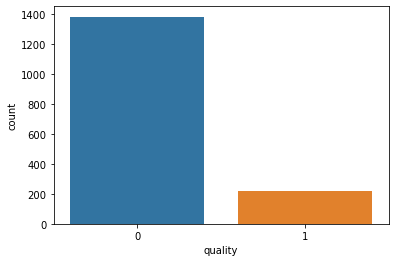

In [13]:
sb.countplot(df['quality'])

the value in count plot of target column is denoting imbalance in the target column

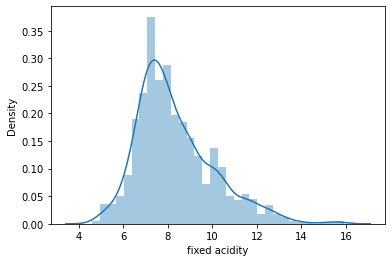

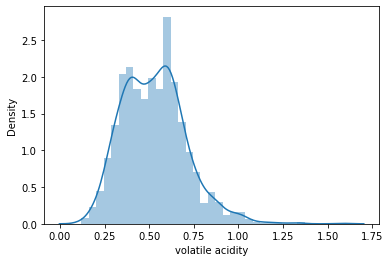

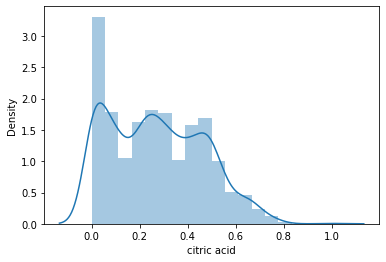

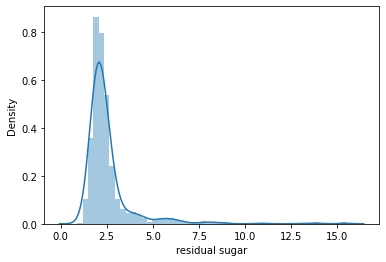

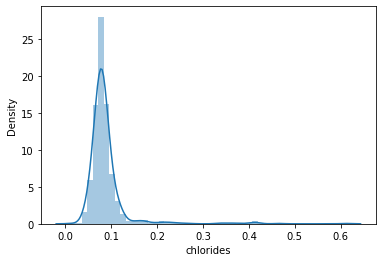

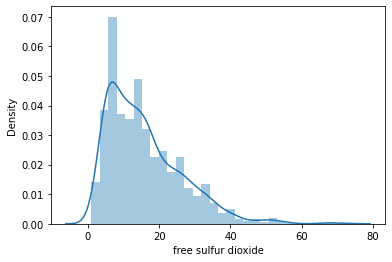

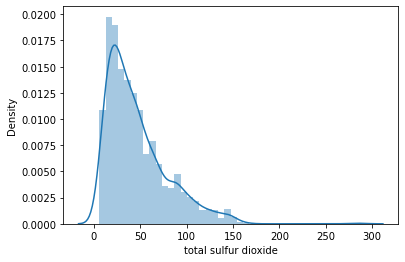

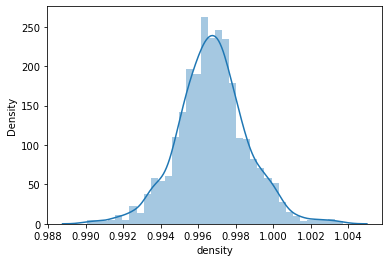

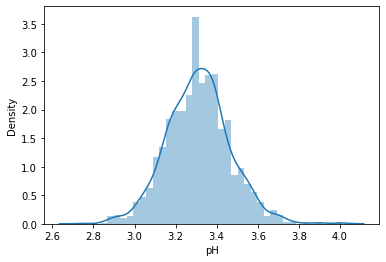

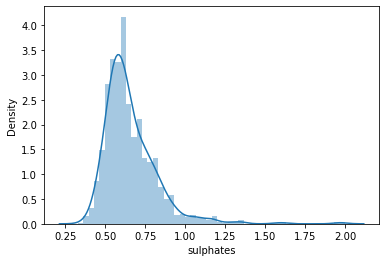

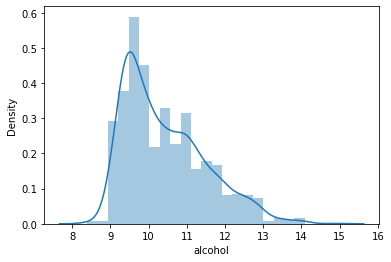

In [14]:
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for i in df[columns]:
    plt.figure()
    sb.distplot(df[i])

'All the columns except 'density','pH' are showing skewness

In [15]:
#scatter plot

# Outlier detection

<AxesSubplot:>

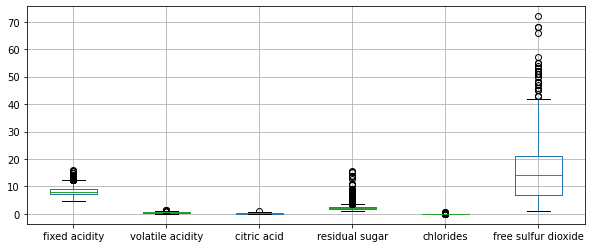

In [16]:
df.iloc[:,0:6].boxplot(figsize=[10,4])

outliers were observed in fixed acidity,residual sugar,free sulphur dioxide with the help of boxplot

<AxesSubplot:>

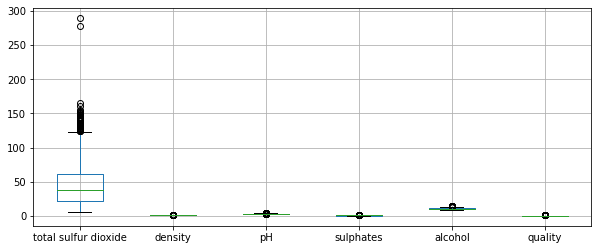

In [17]:
df.iloc[:,6:12].boxplot(figsize=[10,4])

Outlier was seen in total sulphur dioxide column too

# Correlation

In [18]:
cor=df.corr()

In [19]:
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


# Graphical representation of correlation

<function matplotlib.pyplot.show(close=None, block=None)>

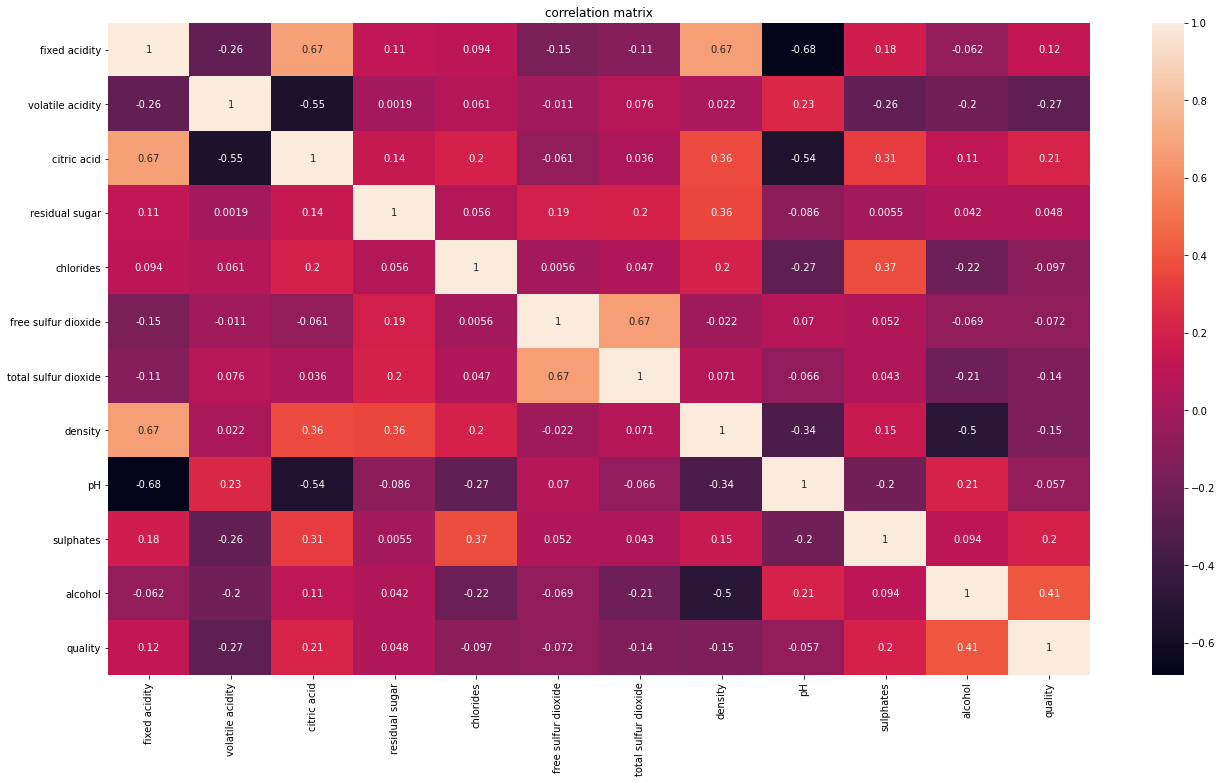

In [20]:
plt.figure(figsize=[22,12])
sb.heatmap(cor,annot=True)
plt.title('correlation matrix')
plt.show

In [21]:
cor['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: quality, dtype: float64

The quality of wine is positively correlated with alcohol,citric acid and sulphate concentration while sulphur dioxide,density and volatile acidity are slightly negatively correlated

# outlier removal

In [22]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [23]:
df.shape

(1599, 12)

In [24]:
new_df.shape

(1458, 12)

loss of data=8.8 percent

# Splitting of Data

In [25]:
x=new_df.iloc[:,0:-1]
y=new_df.iloc[:,-1]

In [26]:
x.shape

(1458, 11)

In [27]:
y.shape

(1458,)

In [28]:
x.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
dtype: float64

above column gives the idea of skewness in different columns

In [29]:
from sklearn.preprocessing import power_transform

In [30]:
df_new=power_transform(x)

In [31]:
df_new=pd.DataFrame(df_new,columns=x.columns)

In [32]:
df_new.skew()

fixed acidity           0.019079
volatile acidity        0.005289
citric acid             0.018652
residual sugar         -0.003351
chlorides              -0.115179
free sulfur dioxide    -0.021273
total sulfur dioxide   -0.005751
density                -0.000989
pH                     -0.000062
sulphates               0.021132
alcohol                 0.108436
dtype: float64

skewness was removed by power transform method

In [33]:
df_new.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.469102,1.045775,-1.52187,-0.610050,-0.145674,-0.238196,-0.063312,0.635233,1.359954,-0.588230,-1.112329
1,-0.172127,1.902404,-1.52187,0.648011,0.981105,1.092232,0.954919,0.056291,-0.818421,0.453527,-0.526854


# standard scaler

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scale=StandardScaler()

In [36]:
df_new1=scale.fit_transform(df_new)
df_new1=pd.DataFrame(df_new1,columns=df_new.columns)

In [37]:
x=df_new1

In [38]:
x.shape

(1458, 11)

In [39]:
y.shape

(1458,)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# finding best random state

In [83]:
from sklearn.linear_model import LogisticRegression
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predLR=LR.predict(x_test)
    acc=f1_score(y_test,predLR)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print(maxaccu)
print(maxrs)

0.5894736842105264
9


In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=9)

# model buiding

In [102]:
model=model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(f1_score(y_test,predm))
    print('\n')

0.5894736842105264


0.5714285714285715


0.4719101123595506


0.6530612244897959




# cross validation

In [96]:
from sklearn.model_selection import cross_val_score

In [97]:
lg=LogisticRegression()
print (cross_val_score(lg,x,y,scoring="f1",cv=5).mean())

0.42686177521679625


In [98]:
dtc=DecisionTreeClassifier()
print (cross_val_score(dtc,x,y,scoring="f1",cv=5).mean())

0.3798107376030511


In [99]:
svc=SVC()
print (cross_val_score(svc,x,y,scoring="f1",cv=5).mean())

0.34831077273582434


In [100]:
rfc=RandomForestClassifier()
print (cross_val_score(rfc,x,y,scoring="f1",cv=5).mean())

0.4012256018464728


In [103]:
#support vector classifier has the least difference in f1 score.So we will use svc 

# hyperparameter tuning

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
parameter={'kernel':['linear','poly','rbf']}
svc=SVC()
gd=GridSearchCV(svc,parameter,scoring='f1',cv=5)

In [106]:
gd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf']}, scoring='f1')

In [107]:
gd.best_params_

{'kernel': 'poly'}

# Final model

In [112]:

Final_model=SVC(kernel='poly',random_state=9)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=f1_score(y_test,pred)
print(acc)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.5510204081632654
[[367  12]
 [ 32  27]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       379
           1       0.69      0.46      0.55        59

    accuracy                           0.90       438
   macro avg       0.81      0.71      0.75       438
weighted avg       0.89      0.90      0.89       438



# saving the model

In [113]:
import joblib

In [110]:
filename='finalwinemodel.pkl'

In [111]:
joblib.dump(Final_model,'finalwinemodel.pkl')

['finalwinemodel.pkl']